In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)               #Each time a new 5 sample


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
3415,ham,Uhhhhrmm isnt having tb test bad when youre sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,ham,Shhhhh nobody is supposed to know!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1869,ham,Mom wants to know where you at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2334,ham,Do you like Italian food?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652,spam,For ur chance to win a �250 cash every wk TXT:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5572, 38)

# 1) Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   v1           5572 non-null   object
 1   v2           5571 non-null   object
 2   Unnamed: 2   255 non-null    object
 3   Unnamed: 3   167 non-null    object
 4   Unnamed: 4   32 non-null     object
 5   Unnamed: 5   23 non-null     object
 6   Unnamed: 6   10 non-null     object
 7   Unnamed: 7   10 non-null     object
 8   Unnamed: 8   5 non-null      object
 9   Unnamed: 9   4 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
 12  Unnamed: 12  1 non-null      object
 13  Unnamed: 13  1 non-null      object
 14  Unnamed: 14  1 non-null      object
 15  Unnamed: 15  1 non-null      object
 16  Unnamed: 16  1 non-null      object
 17  Unnamed: 17  1 non-null      object
 18  Unnamed: 18  1 non-null      object
 19  Unnamed: 19  1 non-null    

In [6]:
#Keep only first 2 columns
df=df.iloc[:,:2]

In [7]:
df.sample(5)

,v1,v2
2565,ham,I told her I had a Dr appt next week. She thin...
3898,ham,�� mean it's confirmed... I tot they juz say o...
1540,ham,K come to nordstrom when you're done
3810,ham,Excellent! Wish we were together right now!
2438,ham,I not busy juz dun wan 2 go so early.. Hee..


In [8]:
df.rename(columns={'v1':'Type','v2':"Description"},inplace=True)

In [9]:
df.sample(5)

,Type,Description
56,spam,Congrats! 1 year special cinema pass for 2 is ...
3950,ham,Hi dude hw r u da realy mising u today
1163,ham,"New Theory: Argument wins d SITUATION, but los..."
1458,ham,"Fighting with the world is easy, u either win ..."
3532,ham,"Sorry, I'll call later"


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['Type']=encoder.fit_transform(df['Type'])

encoder.transform(["spam"])

array([1])

In [12]:
df.head()

,Type,Description
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

Type           0
Description    1
dtype: int64

In [14]:
df[df.isnull().Description==1]

,Type,Description
3035,0,NaN


In [15]:
df.drop(df[df.isnull().Description==1].index,inplace=True)

In [16]:
#duplicate values

df.duplicated().sum()

408

In [17]:
df=df.drop_duplicates(keep='first')         #only the first occurrence of each unique row is kept, and any subsequent duplicate rows are removed.

In [18]:
df.shape

(5163, 2)

# 2) Exploratory Data Analysis

In [19]:
df[df['Type']==1].shape

(653, 2)

In [20]:
df.shape

(5163, 2)

In [21]:
df[df['Type']==0].shape

(4510, 2)

In [22]:
df['Type'].value_counts()

Type
0    4510
1     653
Name: count, dtype: int64

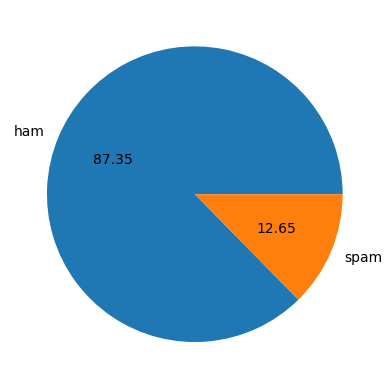

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['Type'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
#Data is inbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/prateek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['Description'].apply(len)

In [28]:
df.head()

,Type,Description,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['num_words']=df['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df['num_sent']=df['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,Type,Description,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5163.000000,5163.000000,5163.000000
mean,77.383498,17.949448,1.944218
std,57.130981,12.802888,1.355741
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,59.000000,14.000000,1.000000
75%,114.000000,26.000000,2.000000
max,910.000000,196.000000,18.000000


In [33]:
df[df['Type']==0]

,Type,Description,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
df.head()

,Type,Description,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
#ham

df[df['Type']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4510.000000,4510.000000,4510.000000
mean,68.688248,16.542129,1.794457
std,54.838171,12.839089,1.266669
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,51.000000,13.000000,1.000000
75%,88.000000,21.000000,2.000000
max,910.000000,196.000000,18.000000


In [36]:
#spam

df[df['Type']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.437979,27.669219,2.978560
std,30.154681,7.030450,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

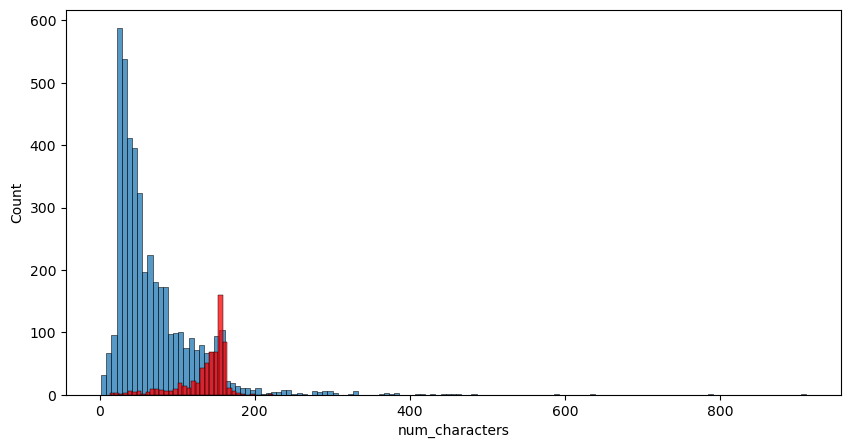

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Type']==0]['num_characters'])
sns.histplot(df[df['Type']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

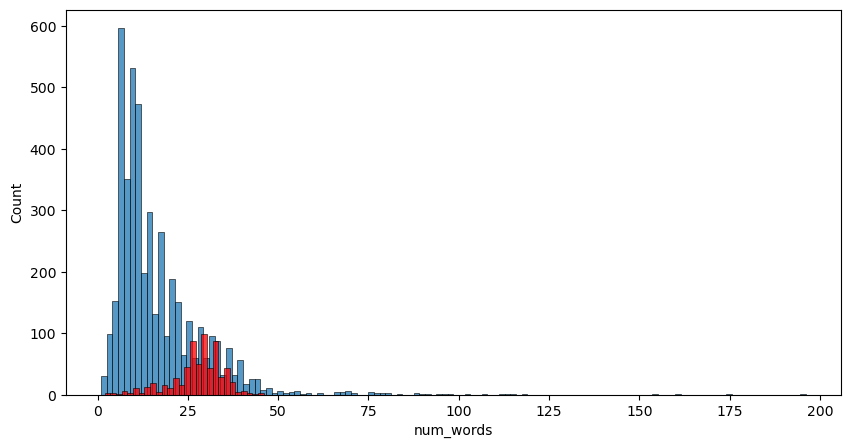

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Type']==0]['num_words'])
sns.histplot(df[df['Type']==1]['num_words'], color='red')

/home/prateek/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


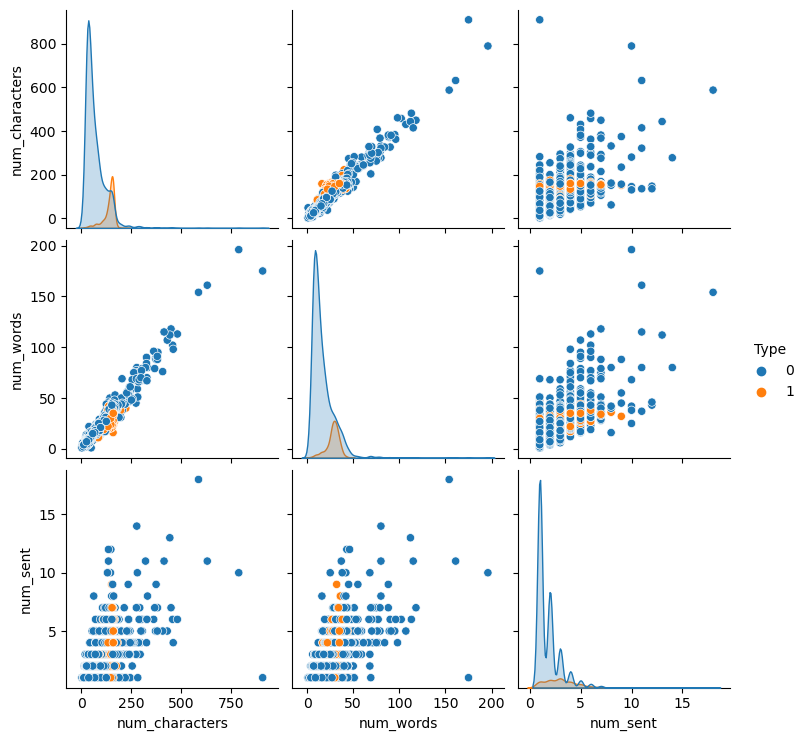

In [40]:
sns.pairplot(df,hue='Type')

In [41]:
df[['Type','num_characters','num_words','num_sent']].corr()

,Type,num_characters,num_words,num_sent
Type,1.000000,0.400022,0.288907,0.290334
num_characters,0.400022,1.000000,0.970684,0.623181
num_words,0.288907,0.970684,1.000000,0.664299
num_sent,0.290334,0.623181,0.664299,1.000000


<Axes: >

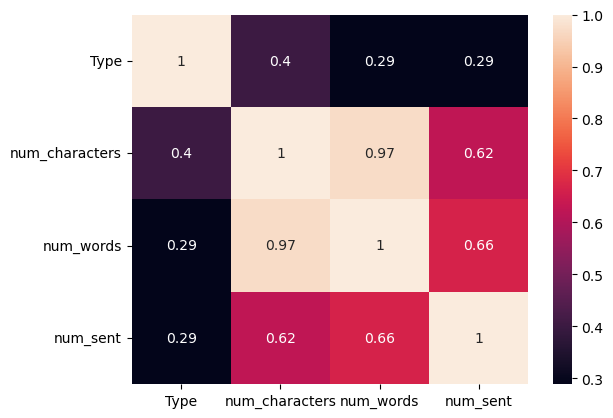

In [42]:
sns.heatmap(df[['Type','num_characters','num_words','num_sent']].corr(),annot=True)


In [43]:

#corr(Type,num_characters) ie 0.4 < corr(Type,num_words) ie 0.29
#So Type and characters are more related than Type and Words

#So we will consider characters

# 3) Data Preprocessing
- Lowercase
- Tokenisation
- Remove Special Characters
- Remove Stopwords and Punctuation
- Stemming

In [44]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]            #Since list is a mutable datatype by text=y any change in y will be seen in text , So do text=y[:] (Clonning)
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [48]:
df['transformed_text']=df['Description'].apply(transform_text)

In [49]:
df

,Type,Description,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [50]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc=wc.generate(df[df['Type']==1]['transformed_text'].str.cat(sep=' '))

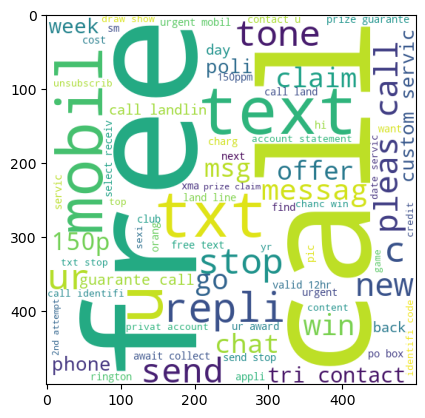

In [52]:
plt.imshow(spam_wc)

In [53]:
ham_wc=wc.generate(df[df['Type']==0]['transformed_text'].str.cat(sep=' '))

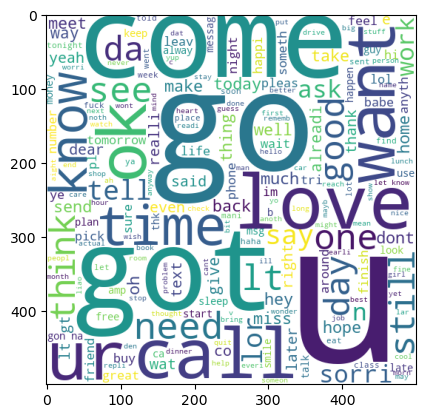

In [54]:
plt.imshow(ham_wc)

In [55]:
# Top 50 words in spam and ham

spam_corpus=[]

for msg in df[df['Type']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [56]:
len(spam_corpus)

9938

In [57]:
from collections import Counter

Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [58]:
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


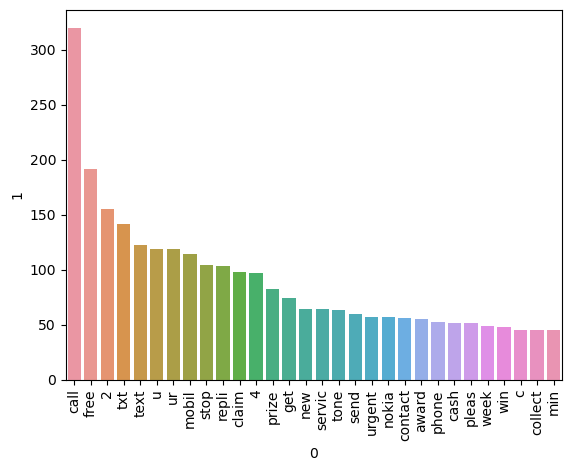

In [59]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')    #Make the label vertical
plt.show()

In [60]:
ham_corpus=[]

for msg in df[df['Type']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

34292

In [62]:
Counter(ham_corpus).most_common(10)

[('u', 865),
 ('go', 400),
 ('get', 340),
 ('2', 280),
 ('come', 271),
 ('lt', 238),
 ('got', 233),
 ('know', 233),
 ('like', 229),
 ('call', 229)]

In [63]:
pd.DataFrame(Counter(ham_corpus).most_common(10))

,0,1
0,u,865
1,go,400
2,get,340
3,2,280
4,come,271
5,lt,238
6,got,233
7,know,233
8,like,229
9,call,229


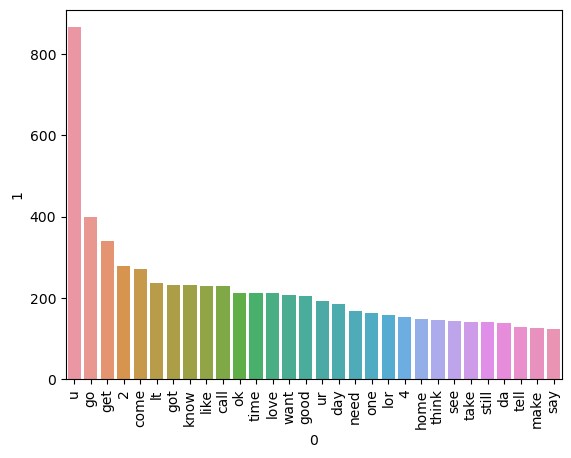

In [64]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [239]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [240]:
# X=cv.fit_transform(df['transformed_text']).toarray()

X=tf.fit_transform(df['transformed_text']).toarray()

In [241]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()                                  #StandardScaler gives -ve values which is not accepted by Naive Bayes
# X=scaler.fit_transform(X)                         #But this is not giving best accuracy and precision 

In [242]:
# #appending the num_characters to X                         #Not good accuracy and precision

# X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [243]:
X.shape

(5163, 3000)

In [244]:
y=df['Type'].values

In [245]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [248]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [249]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [250]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8596321393998064
[[778 123]
 [ 22 110]]
0.4721030042918455


In [251]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))            #As data is inbalanced-> Precision matters more than accuracy
print(confusion_matrix(y_test,y_pred2))          #We want False Positive = 0, no ham should be predicted as spam
print(precision_score(y_test,y_pred2))

0.9757986447241046
[[901   0]
 [ 25 107]]
1.0


In [252]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806389157792836
[[898   3]
 [ 17 115]]
0.9745762711864406


In [253]:
#Since precision matters more we will go with Multinomial Naive Bayes

#We chose Tfidf + MultinomialNB

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [255]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [256]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GDBT':gdbt,
    'xgb':xgb
}

In [257]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [258]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738625363020329, 0.9646017699115044)

In [259]:
accuracy_score_all=[]
precision_score_all=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("**************** For ",name)
    print("Accuracy = ",current_accuracy)
    print("Precision = ",current_precision)
    
    accuracy_score_all.append(current_accuracy)
    precision_score_all.append(current_precision)

**************** For  SVC
Accuracy =  0.9738625363020329
Precision =  0.9646017699115044
**************** For  KN
Accuracy =  0.9109390125847048
Precision =  1.0
**************** For  NB
Accuracy =  0.9757986447241046
Precision =  1.0
**************** For  DT
Accuracy =  0.9428848015488868
Precision =  0.7703703703703704
**************** For  LR
Accuracy =  0.9448209099709584
Precision =  0.9213483146067416
**************** For  RF
Accuracy =  0.9757986447241046
Precision =  0.9908256880733946
**************** For  AdaBoost
Accuracy =  0.9603097773475314
Precision =  0.9099099099099099
**************** For  BgC
Accuracy =  0.9409486931268151
Precision =  0.7709923664122137
**************** For  ETC
Accuracy =  0.9748305905130688
Precision =  0.9732142857142857
**************** For  GDBT
Accuracy =  0.9409486931268151
Precision =  0.9080459770114943
**************** For  xgb
Accuracy =  0.9564375605033882
Precision =  0.8918918918918919


In [260]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_score_all,'Precision':precision_score_all}).sort_values('Precision',ascending=False)

In [261]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.910939,1.000000
2,NB,0.975799,1.000000
5,RF,0.975799,0.990826
8,ETC,0.974831,0.973214
0,SVC,0.973863,0.964602
4,LR,0.944821,0.921348
6,AdaBoost,0.960310,0.909910
9,GDBT,0.940949,0.908046
10,xgb,0.956438,0.891892
7,BgC,0.940949,0.770992


In [262]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [263]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.910939
1,NB,Accuracy,0.975799
2,RF,Accuracy,0.975799
3,ETC,Accuracy,0.974831
4,SVC,Accuracy,0.973863
5,LR,Accuracy,0.944821
6,AdaBoost,Accuracy,0.960310
7,GDBT,Accuracy,0.940949
8,xgb,Accuracy,0.956438
9,BgC,Accuracy,0.940949


/home/prateek/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


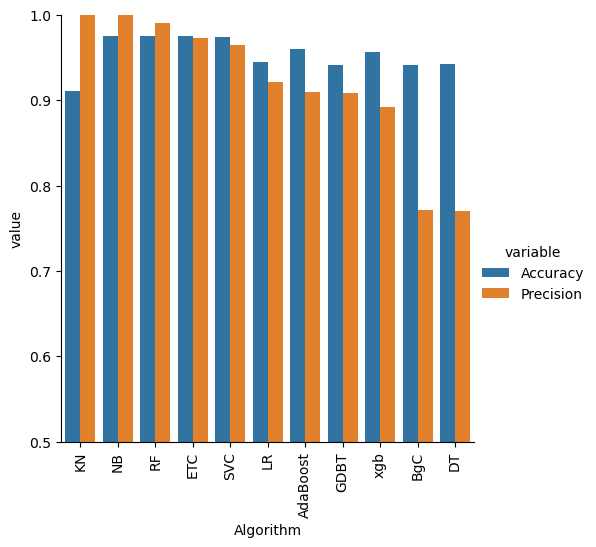

In [264]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [228]:
# Voting Classifier

svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [229]:
voting =VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [230]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [231]:
y_pred_voting=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_voting))
print("Precision",precision_score(y_test,y_pred_voting))

Accuracy 0.9370764762826719
Precision 1.0


In [232]:
# Applying Stacking

estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [233]:
from sklearn.ensemble import StackingClassifier

clf_Stacking=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [234]:
clf_Stacking.fit(X_train,y_train)


StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [235]:
y_pred_stacking=clf_Stacking.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred_stacking))
print("Precision = ",precision_score(y_test,y_pred_stacking))

Accuracy =  0.9796708615682478
Precision =  0.9826086956521739


In [265]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))